# Project - Ford Go Bike 2019 Data Exploration
## by (Ibrahim Sayed Ahmed)

## Investigation Overview

> The data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. This exploration and visualization study primarily focuses on finding the bike usage pattern and customer habit characteristics from the trips data in 2019.

## Dataset Overview

> The dataset used for this exploratory analysis consists of monthly individual trip data in CSV format covering the greater San Francisco Bay area. Visualizations below are created from wrangled and cleaned data to facilitate exploration analysis and help discover usage pattern and rider characteristics.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
# I loaded the clean saved data after been wrangled and cleaned
df = pd.read_csv('201902-fordgobike-tripdata-clean.csv')
df.head()

,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,end_date,start_hour,end_hour,start_dayofweek,end_dayofweek,start_month,end_month,duration_min,member_age
0,21,13,4902,Customer,1984,Male,No,2019-02-28,2019-03-01,17,8,Thursday,Friday,Feb,Mar,869.750000,35
1,86,3,5905,Customer,1972,Male,No,2019-02-28,2019-03-01,12,5,Thursday,Friday,Feb,Mar,1030.900000,47
2,375,70,6638,Subscriber,1989,Other,No,2019-02-28,2019-03-01,17,4,Thursday,Friday,Feb,Mar,608.166667,30
3,7,222,4898,Subscriber,1974,Male,Yes,2019-02-28,2019-03-01,23,0,Thursday,Friday,Feb,Mar,26.416667,45
4,93,323,5200,Subscriber,1959,Male,No,2019-02-28,2019-03-01,23,0,Thursday,Friday,Feb,Mar,29.883333,60


## User Types and Their  Weekly Usage

> Subscribers contributed the majority of rides, about 90%, while about 10% were consumed by cusomters.
> Subscribers use the service daily and more during weekdays than weekends , Tue, Wed, Thu see the peak usage of this service

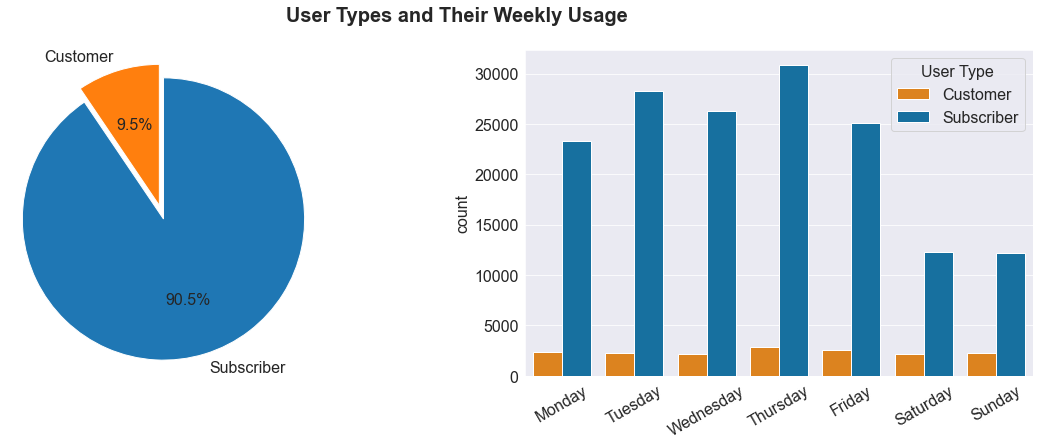

In [37]:
plt.figure(figsize=[20, 6])
base_color = sb.color_palette()[0]
palette=[ "#fb8500",'#0077b6']
sb.set_style('darkgrid');

plt.subplot(1, 2, 1) 
## Comparing the different amount of user types
user_type_count = df['user_type'].value_counts()
plt.pie(user_type_count, labels = user_type_count.index,autopct='%1.1f%%', startangle=90,
        counterclock=False, explode = (0, 0.1))
plt.axis('square')
plt.xlabel('')
plt.rcParams['font.size'] = '16'

plt.subplot(1, 2, 2)
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
week_category = pd.api.types.CategoricalDtype(ordered=True, categories=days_of_week)
df['start_dayofweek'] = df['start_dayofweek'].astype(week_category)
sb.countplot(data = df, x = 'start_dayofweek',hue ='user_type', palette=palette)
plt.legend(title='User Type')
plt.xticks(rotation=30)
plt.xlabel('');


plt.suptitle('User Types and Their Weekly Usage', fontsize=20, fontweight='semibold');

## Average Weekday Trip Duration for Customers and Subscribers

> subscribers take significantly shorter/quicker trips than customers on each day of the week. On Saturdays and Sundays, both user types have a noticeable increase in trip duration over weekends, particularly casual riders. Subscribers seem to be more effective than consumers in general, with a very consistent average period from Monday to Friday.

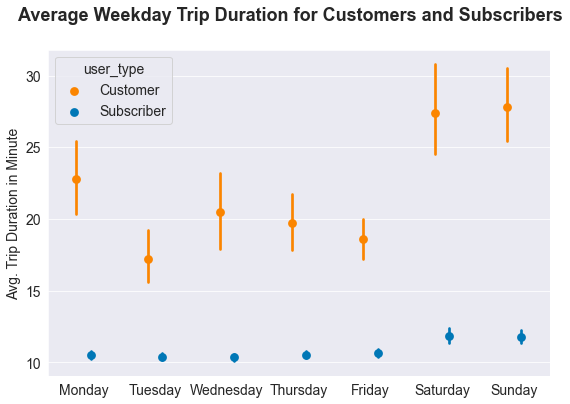

In [5]:
plt.figure(figsize=[9, 6])
sb.pointplot(data=df, x='start_dayofweek', y='duration_min', hue='user_type',dodge=0.2,
             linestyles="", palette=palette)
plt.xlabel('')
plt.ylabel('Avg. Trip Duration in Minute')
plt.suptitle('Average Weekday Trip Duration for Customers and Subscribers', fontsize=18, fontweight='semibold');

## Hourly Usage for Customers and Subscribers

> Many trips concentrated around 8-9 am and 5-6 pm on work days for subscribers when used for work commute.



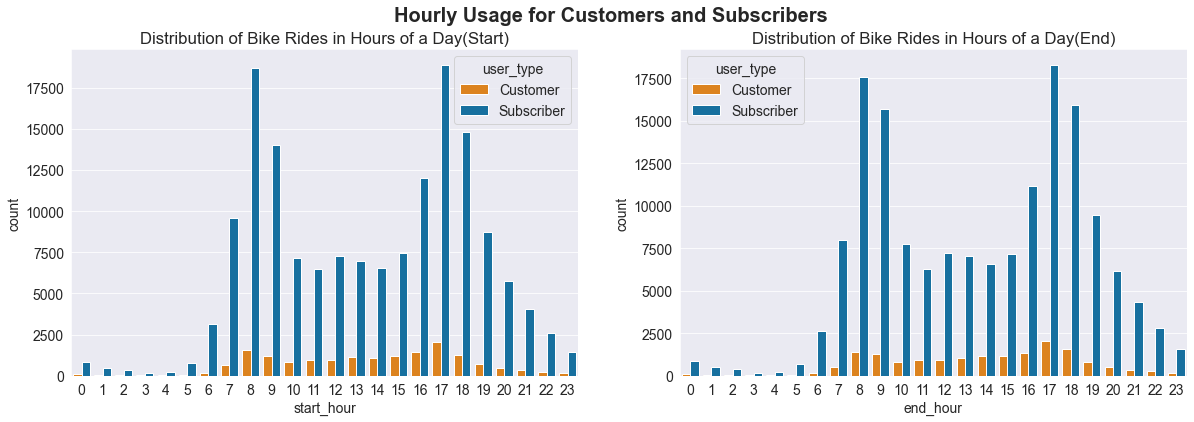

In [22]:

plt.figure(figsize=[20,6])
plt.subplot(1, 2, 1) 
sb.countplot(data = df, x = 'start_hour', hue='user_type',palette=palette)
plt.title('Distribution of Bike Rides in Hours of a Day(Start)');

plt.subplot(1, 2, 2)
sb.countplot(data = df, x = 'end_hour', hue='user_type',palette=palette)
plt.title('Distribution of Bike Rides in Hours of a Day(End)')

plt.suptitle('Hourly Usage for Customers and Subscribers', fontsize=20, fontweight='semibold');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!